In [45]:
!pip install altair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 5.3 MB/s eta 0:00:0000:0100:01


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#Merging song and genre/artist data

In [2]:
dfspotify = pd.read_csv("playlist_songs_spotify.csv")
dfgenres = pd.read_csv("track_genres.csv")
dfmyspotify = pd.read_csv("my_spotify.csv")
dfmygenres = pd.read_csv("my_genres.csv")

In [10]:
dfspotify

,track_id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,1vYXt7VSjH9JIM5oRRo7vA,Dance The Night (From Barbie The Album),Dance The Night (From Barbie The Album),Dua Lipa,2023-05-25,176579,84,0.671,0.020700,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4
1,0yLdNVWF3Srea0uzk55zFn,Flowers,Flowers,Miley Cyrus,2023-01-13,200454,97,0.707,0.063200,0.681,0.000005,0.0322,-4.325,0.0668,117.999,4
2,7ro0hRteUMfnOioTFI5TG1,WHERE SHE GOES,WHERE SHE GOES,Bad Bunny,2023-05-18,231704,95,0.652,0.143000,0.800,0.629000,0.1120,-4.019,0.0614,143.978,4
3,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SOS,SZA,2022-12-08,153946,94,0.644,0.052100,0.735,0.144000,0.1610,-5.747,0.0391,88.980,4
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,The Beginning: Cupid,FIFTY FIFTY,2023-02-24,174253,98,0.783,0.435000,0.592,0.000004,0.3470,-8.332,0.0331,120.018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,7fYOZjdpOv8dBtzPnXysOG,Home Is Such A Lonely Place,California,blink-182,2016-07-01,201480,55,0.331,0.008770,0.672,0.000001,0.1110,-5.679,0.0324,115.001,4
9559,3DuH3vgKy6oqhgesvbH1ZC,Pathetic,Dude Ranch,blink-182,1997-01-01,148706,52,0.235,0.000007,0.959,0.000002,0.3000,-4.652,0.0831,102.646,4
9560,1gofFAslBqWqeZ1F73GaJe,Misery,California (Deluxe Edition),blink-182,2017-05-19,231986,53,0.463,0.008140,0.949,0.000013,0.6010,-3.092,0.0978,162.020,4
9561,5uqOdeWBd2gFKUAJPoy1q6,Dogs Eating Dogs,Dogs Eating Dogs,blink-182,2012-12-18,210520,53,0.500,0.000605,0.985,0.000043,0.2920,-3.684,0.0532,93.566,4


In [11]:
dfgenres

,track_id,genres,followers,popularity
0,1vYXt7VSjH9JIM5oRRo7vA,"['dance pop', 'pop', 'uk pop']",40024254,87
1,0yLdNVWF3Srea0uzk55zFn,['pop'],20919467,88
2,7ro0hRteUMfnOioTFI5TG1,"['reggaeton', 'trap latino', 'urbano latino']",69830946,97
3,1Qrg8KqiBpW07V7PNxwwwL,"['pop', 'r&b', 'rap']",12806283,90
4,7FbrGaHYVDmfr7KoLIZnQ7,['k-pop girl group'],789675,81
...,...,...,...,...
9558,7fYOZjdpOv8dBtzPnXysOG,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
9559,3DuH3vgKy6oqhgesvbH1ZC,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
9560,1gofFAslBqWqeZ1F73GaJe,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
9561,5uqOdeWBd2gFKUAJPoy1q6,"['alternative metal', 'modern rock', 'pop punk...",7602204,78


In [12]:
dfmyspotify

,track_id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Fine Line,Harry Styles,2019-12-13,174000,90,0.548,0.12200,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4
1,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,Illuminate (Deluxe),Shawn Mendes,2017-04-20,199440,88,0.866,0.38000,0.813,0.000000,0.0779,-4.063,0.0554,121.998,4
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,89,0.825,0.58100,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4
3,2hrUO4drrO63i7FYbCLBl2,Rockabye (feat. Sean Paul & Anne-Marie),What Is Love? (Deluxe Edition),Clean Bandit,2018-11-30,251173,74,0.717,0.38300,0.730,0.000000,0.3980,-4.729,0.0568,102.002,4
4,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,After Hours,The Weeknd,2020-03-20,200040,92,0.514,0.00146,0.730,0.000095,0.0897,-5.934,0.0598,171.005,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,x (Deluxe Edition),Ed Sheeran,2014-06-21,258986,87,0.614,0.60700,0.379,0.000464,0.0986,-10.480,0.0476,107.989,4
96,3cHyrEgdyYRjgJKSOiOtcS,Timber (feat. Ke$ha),Global Warming: Meltdown (Deluxe Version),Pitbull,2012,204160,84,0.581,0.02950,0.963,0.000000,0.1390,-4.087,0.0981,129.992,4
97,0C4ejWmOTMv8vuYj85mf8m,S&M,Loud,Rihanna,2010-11-16,243533,75,0.767,0.01130,0.682,0.000160,0.1040,-5.020,0.0420,127.975,4
98,5PsMbxhgWpJMsouEfDTX6r,Locked out of Heaven,Locked out of Heaven,Bruno Mars,2012-10-02,233478,45,0.726,0.04900,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4


In [13]:
dfmygenres

,track_id,genres,followers,popularity
0,6UelLqGlWMcVH1E5c4H7lY,['pop'],27740169,88
1,7JJmb5XwzOO8jgpou264Ml,"['canadian pop', 'pop', 'viral pop']",41669212,83
2,7qiZfU4dY1lWllzX7mPBI3,"['pop', 'uk pop']",112455903,91
3,2hrUO4drrO63i7FYbCLBl2,"['pop', 'uk dance', 'uk funky']",5187446,74
4,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ...",65720504,95
...,...,...,...,...
95,1HNkqx9Ahdgi1Ixy2xkKkL,"['pop', 'uk pop']",112455903,91
96,3cHyrEgdyYRjgJKSOiOtcS,"['dance pop', 'miami hip hop', 'pop']",10023789,82
97,0C4ejWmOTMv8vuYj85mf8m,"['barbadian pop', 'pop', 'urban contemporary']",55519329,90
98,5PsMbxhgWpJMsouEfDTX6r,"['dance pop', 'pop']",48489803,87


In [20]:
dfspotify = dfspotify[~dfspotify.duplicated('track_id')]

In [21]:
dfgenres = dfgenres[~dfgenres.duplicated('track_id')]

In [22]:
dfspotifyall = pd.merge(dfspotify, dfgenres, on='track_id')
dfspotifyall = dfspotifyall.reset_index(drop=True)

In [23]:
dfspotifyall

,track_id,name,album,artist,release_date,length,popularity_x,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres,followers,popularity_y
0,1vYXt7VSjH9JIM5oRRo7vA,Dance The Night (From Barbie The Album),Dance The Night (From Barbie The Album),Dua Lipa,2023-05-25,176579,84,0.671,0.020700,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4,"['dance pop', 'pop', 'uk pop']",40024254,87
1,0yLdNVWF3Srea0uzk55zFn,Flowers,Flowers,Miley Cyrus,2023-01-13,200454,97,0.707,0.063200,0.681,0.000005,0.0322,-4.325,0.0668,117.999,4,['pop'],20919467,88
2,7ro0hRteUMfnOioTFI5TG1,WHERE SHE GOES,WHERE SHE GOES,Bad Bunny,2023-05-18,231704,95,0.652,0.143000,0.800,0.629000,0.1120,-4.019,0.0614,143.978,4,"['reggaeton', 'trap latino', 'urbano latino']",69830946,97
3,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SOS,SZA,2022-12-08,153946,94,0.644,0.052100,0.735,0.144000,0.1610,-5.747,0.0391,88.980,4,"['pop', 'r&b', 'rap']",12806283,90
4,7FbrGaHYVDmfr7KoLIZnQ7,Cupid - Twin Ver.,The Beginning: Cupid,FIFTY FIFTY,2023-02-24,174253,98,0.783,0.435000,0.592,0.000004,0.3470,-8.332,0.0331,120.018,4,['k-pop girl group'],789675,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,7fYOZjdpOv8dBtzPnXysOG,Home Is Such A Lonely Place,California,blink-182,2016-07-01,201480,55,0.331,0.008770,0.672,0.000001,0.1110,-5.679,0.0324,115.001,4,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
8311,3DuH3vgKy6oqhgesvbH1ZC,Pathetic,Dude Ranch,blink-182,1997-01-01,148706,52,0.235,0.000007,0.959,0.000002,0.3000,-4.652,0.0831,102.646,4,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
8312,1gofFAslBqWqeZ1F73GaJe,Misery,California (Deluxe Edition),blink-182,2017-05-19,231986,53,0.463,0.008140,0.949,0.000013,0.6010,-3.092,0.0978,162.020,4,"['alternative metal', 'modern rock', 'pop punk...",7602204,78
8313,5uqOdeWBd2gFKUAJPoy1q6,Dogs Eating Dogs,Dogs Eating Dogs,blink-182,2012-12-18,210520,53,0.500,0.000605,0.985,0.000043,0.2920,-3.684,0.0532,93.566,4,"['alternative metal', 'modern rock', 'pop punk...",7602204,78


In [35]:
dfmyspotify = dfmyspotify[~dfmyspotify.duplicated('track_id')]
dfmygenres = dfmygenres[~dfmygenres.duplicated('track_id')]
dfmyspotifyall = pd.merge(dfmyspotify, dfmygenres, on='track_id')
dfmyspotifyall = dfmyspotifyall.reset_index(drop=True)
dfmyspotifyall

,track_id,name,album,artist,release_date,length,popularity_x,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres,followers,popularity_y
0,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Fine Line,Harry Styles,2019-12-13,174000,90,0.548,0.12200,0.816,0.000000,0.3350,-4.209,0.0465,95.390,4,['pop'],27740169,88
1,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,Illuminate (Deluxe),Shawn Mendes,2017-04-20,199440,88,0.866,0.38000,0.813,0.000000,0.0779,-4.063,0.0554,121.998,4,"['canadian pop', 'pop', 'viral pop']",41669212,83
2,7qiZfU4dY1lWllzX7mPBI3,Shape of You,÷ (Deluxe),Ed Sheeran,2017-03-03,233712,89,0.825,0.58100,0.652,0.000000,0.0931,-3.183,0.0802,95.977,4,"['pop', 'uk pop']",112455903,91
3,2hrUO4drrO63i7FYbCLBl2,Rockabye (feat. Sean Paul & Anne-Marie),What Is Love? (Deluxe Edition),Clean Bandit,2018-11-30,251173,74,0.717,0.38300,0.730,0.000000,0.3980,-4.729,0.0568,102.002,4,"['pop', 'uk dance', 'uk funky']",5187446,74
4,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,After Hours,The Weeknd,2020-03-20,200040,92,0.514,0.00146,0.730,0.000095,0.0897,-5.934,0.0598,171.005,4,"['canadian contemporary r&b', 'canadian pop', ...",65720504,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,x (Deluxe Edition),Ed Sheeran,2014-06-21,258986,87,0.614,0.60700,0.379,0.000464,0.0986,-10.480,0.0476,107.989,4,"['pop', 'uk pop']",112455903,91
96,3cHyrEgdyYRjgJKSOiOtcS,Timber (feat. Ke$ha),Global Warming: Meltdown (Deluxe Version),Pitbull,2012,204160,84,0.581,0.02950,0.963,0.000000,0.1390,-4.087,0.0981,129.992,4,"['dance pop', 'miami hip hop', 'pop']",10023789,82
97,0C4ejWmOTMv8vuYj85mf8m,S&M,Loud,Rihanna,2010-11-16,243533,75,0.767,0.01130,0.682,0.000160,0.1040,-5.020,0.0420,127.975,4,"['barbadian pop', 'pop', 'urban contemporary']",55519329,90
98,5PsMbxhgWpJMsouEfDTX6r,Locked out of Heaven,Locked out of Heaven,Bruno Mars,2012-10-02,233478,45,0.726,0.04900,0.698,0.000000,0.3090,-4.165,0.0431,143.994,4,"['dance pop', 'pop']",48489803,87


In [88]:
dfspotifyall.to_csv('dfspotifyall.csv', index=False)
dfmyspotifyall.to_csv('dfmyspotifyall.csv', index=False)

In [2]:
dfspotifyall = pd.read_csv("dfspotifyall.csv")
dfmyspotifyall = pd.read_csv("dfmyspotifyall.csv")

In [ ]:
#Getting most common genres in the data

In [4]:
genre_counts = Counter()
for x in range(len(dfspotifyall['genres'])):
    better_list = ast.literal_eval(dfspotifyall['genres'][x])
    genre_counts.update(better_list)
    
popular = genre_counts.most_common(20)


In [5]:
popular = genre_counts.most_common(20)

In [76]:
popular

[('classical', 1183),
 ('rock', 1107),
 ('pop', 533),
 ('classic rock', 445),
 ('edm', 433),
 ('modern rock', 412),
 ('pop dance', 390),
 ('permanent wave', 333),
 ('contemporary country', 320),
 ('late romantic era', 297),
 ('post-romantic era', 285),
 ('r&b', 284),
 ('hard rock', 279),
 ('dance pop', 275),
 ('country', 268),
 ('singer-songwriter', 265),
 ('german romanticism', 263),
 ('alternative rock', 262),
 ('album rock', 257),
 ('alternative metal', 256)]

In [7]:
genre_names = []
for x in popular:
    genre_names.append(x[0])

In [8]:
genre_counts = []
for x in popular:
    genre_counts.append(x[1])

In [78]:
genres_key = {}
key = 1
for genre in genre_names:
    genres_key[genre] = key
    key += 1

In [84]:
genres_key["classical"]

1

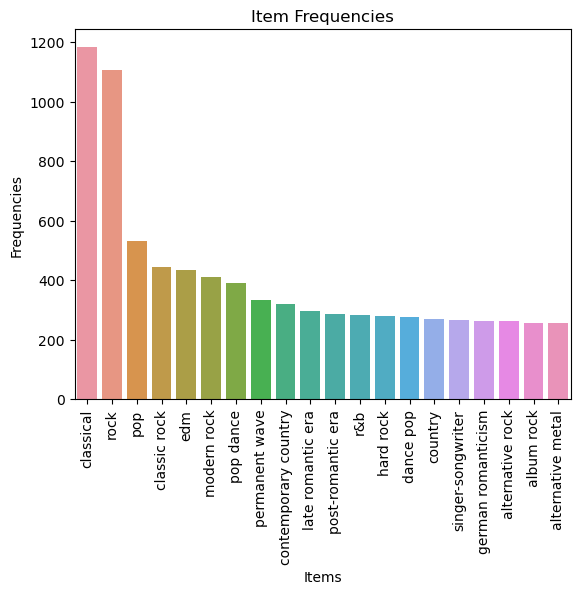

In [9]:
sns.barplot(x=genre_names, y=genre_counts)
plt.xlabel('Items')
plt.ylabel('Frequencies')
plt.title('Item Frequencies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Filtering based on popular genres

In [10]:
def filter_popular_genres(df, column_name, num_genres=20):
    df[column_name] = df[column_name].apply(ast.literal_eval)
    
    genre_counts = Counter()
    for genres in df[column_name]:
        genre_counts.update(genres)
    
    popular = genre_counts.most_common(num_genres)
    popular_genres = [genre for genre, _ in popular]
    
    df['genre_classification'] = df[column_name].apply(lambda x: tuple([popular_genres.index(genre) + 1 for genre in x if genre in popular_genres]))
    
    filtered_df = df[df[column_name].apply(lambda x: any(genre in x for genre in popular_genres))]
    
    return filtered_df

In [11]:
filtered_df = filter_popular_genres(dfspotifyall, 'genres')

In [12]:
top_20_genres = filtered_df.reset_index()

In [13]:
top_20_genres = top_20_genres.drop('index', axis=1)

In [14]:
top_20_genres

,track_id,name,album,artist,release_date,length,popularity_x,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres,followers,popularity_y,genre_classification
0,1vYXt7VSjH9JIM5oRRo7vA,Dance The Night (From Barbie The Album),Dance The Night (From Barbie The Album),Dua Lipa,2023-05-25,176579,84,0.671,0.020700,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4,"[dance pop, pop, uk pop]",40024254,87,"(14, 3)"
1,0yLdNVWF3Srea0uzk55zFn,Flowers,Flowers,Miley Cyrus,2023-01-13,200454,97,0.707,0.063200,0.681,0.000005,0.0322,-4.325,0.0668,117.999,4,[pop],20919467,88,"(3,)"
2,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SOS,SZA,2022-12-08,153946,94,0.644,0.052100,0.735,0.144000,0.1610,-5.747,0.0391,88.980,4,"[pop, r&b, rap]",12806283,90,"(3, 12)"
3,4LRPiXqCikLlN15c3yImP7,As It Was,As It Was,Harry Styles,2022-03-31,167303,92,0.520,0.342000,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4,[pop],27723678,88,"(3,)"
4,7oDd86yk8itslrA9HRP2ki,Die For You - Remix,Die For You (Remix),The Weeknd,2023-02-24,232857,93,0.531,0.232000,0.525,0.000000,0.4410,-6.500,0.0671,66.900,4,"[canadian contemporary r&b, canadian pop, pop]",65663054,95,"(3,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,7fYOZjdpOv8dBtzPnXysOG,Home Is Such A Lonely Place,California,blink-182,2016-07-01,201480,55,0.331,0.008770,0.672,0.000001,0.1110,-5.679,0.0324,115.001,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4236,3DuH3vgKy6oqhgesvbH1ZC,Pathetic,Dude Ranch,blink-182,1997-01-01,148706,52,0.235,0.000007,0.959,0.000002,0.3000,-4.652,0.0831,102.646,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4237,1gofFAslBqWqeZ1F73GaJe,Misery,California (Deluxe Edition),blink-182,2017-05-19,231986,53,0.463,0.008140,0.949,0.000013,0.6010,-3.092,0.0978,162.020,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4238,5uqOdeWBd2gFKUAJPoy1q6,Dogs Eating Dogs,Dogs Eating Dogs,blink-182,2012-12-18,210520,53,0.500,0.000605,0.985,0.000043,0.2920,-3.684,0.0532,93.566,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"


In [ ]:
#Exploring Artist data and removing "Various Artists" from data

In [72]:
def plots(df, genre_number):
    filtered_data = df[df['genre_classification'].apply(lambda genre: genre_number in genre)]
    df['highlight'] = df.index.isin(filtered_data.index)

    sns.scatterplot(data=df, x='followers', y='popularity_y', hue='highlight')
    plt.xlabel('Followers')
    plt.ylabel('Popularity')

    df = df.drop('highlight', axis=1)
    
    return plt.gcf()

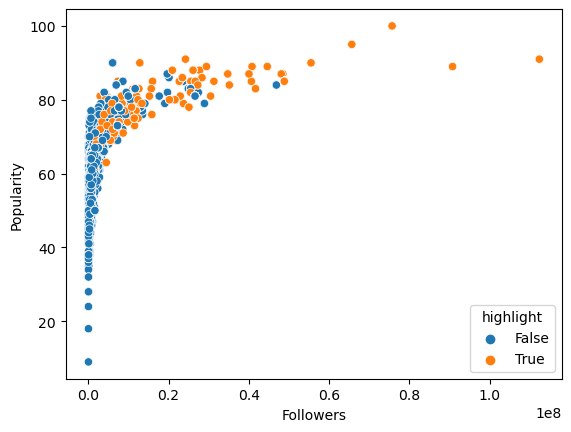

In [75]:
my_plot = plots(top_20_genres, 3)
plt.show()

In [15]:
top_20_genres_artists = top_20_genres[top_20_genres['artist'] != "Various Artists"]

In [16]:
top_20_genres_artists

,track_id,name,album,artist,release_date,length,popularity_x,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres,followers,popularity_y,genre_classification
0,1vYXt7VSjH9JIM5oRRo7vA,Dance The Night (From Barbie The Album),Dance The Night (From Barbie The Album),Dua Lipa,2023-05-25,176579,84,0.671,0.020700,0.845,0.000000,0.3290,-4.930,0.0480,110.056,4,"[dance pop, pop, uk pop]",40024254,87,"(14, 3)"
1,0yLdNVWF3Srea0uzk55zFn,Flowers,Flowers,Miley Cyrus,2023-01-13,200454,97,0.707,0.063200,0.681,0.000005,0.0322,-4.325,0.0668,117.999,4,[pop],20919467,88,"(3,)"
2,1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,SOS,SZA,2022-12-08,153946,94,0.644,0.052100,0.735,0.144000,0.1610,-5.747,0.0391,88.980,4,"[pop, r&b, rap]",12806283,90,"(3, 12)"
3,4LRPiXqCikLlN15c3yImP7,As It Was,As It Was,Harry Styles,2022-03-31,167303,92,0.520,0.342000,0.731,0.001010,0.3110,-5.338,0.0557,173.930,4,[pop],27723678,88,"(3,)"
4,7oDd86yk8itslrA9HRP2ki,Die For You - Remix,Die For You (Remix),The Weeknd,2023-02-24,232857,93,0.531,0.232000,0.525,0.000000,0.4410,-6.500,0.0671,66.900,4,"[canadian contemporary r&b, canadian pop, pop]",65663054,95,"(3,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,7fYOZjdpOv8dBtzPnXysOG,Home Is Such A Lonely Place,California,blink-182,2016-07-01,201480,55,0.331,0.008770,0.672,0.000001,0.1110,-5.679,0.0324,115.001,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4236,3DuH3vgKy6oqhgesvbH1ZC,Pathetic,Dude Ranch,blink-182,1997-01-01,148706,52,0.235,0.000007,0.959,0.000002,0.3000,-4.652,0.0831,102.646,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4237,1gofFAslBqWqeZ1F73GaJe,Misery,California (Deluxe Edition),blink-182,2017-05-19,231986,53,0.463,0.008140,0.949,0.000013,0.6010,-3.092,0.0978,162.020,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"
4238,5uqOdeWBd2gFKUAJPoy1q6,Dogs Eating Dogs,Dogs Eating Dogs,blink-182,2012-12-18,210520,53,0.500,0.000605,0.985,0.000043,0.2920,-3.684,0.0532,93.566,4,"[alternative metal, modern rock, pop punk, pun...",7602204,78,"(20, 6, 2)"


In [ ]:
#Creating a function to recommend the 5 artists with the lowest follower count

In [19]:
def get_artist(df, genre_number):
    df_multiple_columns = top_20_genres_artists[['artist', 'followers', 'genre_classification']]
    df = df_multiple_columns.drop_duplicates()
    test_1 = df[df['genre_classification'].apply(lambda x: genre_number in x)]
    lowest_followers = test_1.sort_values('followers').head(5)
    lowest_followers = lowest_followers[['artist', 'followers']].reset_index()
    return lowest_followers

In [20]:
get_artist(top_20_genres, 20)

,index,artist,followers
0,1269,Biohazard,166970
1,617,Corey Taylor,464651
2,478,Filter,490931
3,615,Pop Evil,520729
4,1107,Bad Wolves,625343


In [ ]:
#Content based filtering using cosine similarity on genre

In [34]:
#df1 is users playlist, and df2 is the spotify data
def recommondations_on_genre(df1, df2, genre_number):
    vector_columns = ["danceability", "acousticness", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "time_signature"]
    
    dataframe1 = df1[vector_columns]
    
    dataframe2temp = df2[df2['genre_classification'].apply(lambda x: genre_number in x)]
    dataframe2 = dataframe2temp[vector_columns]
    
    similarity_matrix = cosine_similarity(dataframe1.values, dataframe2.values)
    
    average_similarity_scores = np.mean(similarity_matrix, axis=0)
    
    top_similar_indices = np.argsort(average_similarity_scores)[-10:][::-1]
    
    top_similar_rows = dataframe2temp.iloc[top_similar_indices]
    
    return top_similar_rows
    

In [86]:
recommondations_on_genre(dfmyspotifyall, top_20_genres, 2)


,track_id,name,album,artist,release_date,length,popularity_x,danceability,acousticness,energy,...,liveness,loudness,speechiness,tempo,time_signature,genres,followers,popularity_y,genre_classification,highlight
433,7u2nN6yhi4SfFyMHLE032Q,Hold Me Like a Grudge,So Much (For) Stardust,Fall Out Boy,2023-03-24,215601,70,0.646,0.000305,0.798,...,0.0922,-5.283,0.0767,113.959,4,"[emo, modern rock, pop, pop punk, rock]",10042848,79,"(6, 3, 2)",True
204,7w87IxuO7BDcJ3YUqCyMTT,Pumped Up Kicks,Torches,Foster The People,2011-05-23,239600,85,0.733,0.145000,0.710,...,0.0956,-5.849,0.0292,127.975,4,"[indietronica, modern alternative rock, modern...",3702037,71,"(6, 2)",False
989,7ETQjnmWqDVyDtNR5gYAWL,War Machine - 2022 Remastered,Creatures Of The Night (40th Anniversary / Sup...,KISS,1982,257280,54,0.499,0.010100,0.939,...,0.1680,-5.298,0.0651,116.081,4,"[glam rock, hard rock, rock]",8546328,72,"(13, 2)",False
703,50J9zbu0UzOFnUVSjvecl7,Your Team Is Looking Good,Dropout Boogie,The Black Keys,2022-05-13,185120,49,0.649,0.345000,0.734,...,0.3180,-5.454,0.0529,114.651,4,"[alternative rock, blues rock, garage rock, in...",3869913,71,"(18, 6, 2)",False
701,0zo4T5c5VV42554ySEc5J6,Gotta Get Away,Turn Blue,The Black Keys,2014-05-09,180173,54,0.475,0.017500,0.836,...,0.1040,-5.446,0.0529,123.144,4,"[alternative rock, blues rock, garage rock, in...",3869913,71,"(18, 6, 2)",False
4076,5uvosCdMlFdTXhoazkTI5R,Light My Fire,The Doors,The Doors,1967-01-04,429760,72,0.413,0.369000,0.725,...,0.0905,-5.787,0.0324,124.618,4,"[acid rock, album rock, classic rock, hard roc...",7247837,73,"(19, 4, 13, 2)",False
1220,5QNWATWEQiM9S7rsFUu0Ns,Drones,Drones,grandson,2023-03-24,150007,60,0.586,0.039600,0.822,...,0.3100,-5.721,0.2690,126.127,4,"[modern alternative rock, modern rock, pov: in...",1062335,68,"(6, 2)",False
1088,6FzhHrUtyl7jWFccWxNFSS,Wings Of Time - From the Motion Picture Dungeo...,Wings Of Time (From the Motion Picture Dungeon...,Tame Impala,2023-03-10,168786,65,0.653,0.012100,0.806,...,0.1280,-5.603,0.0468,127.946,4,"[australian psych, modern rock, neo-psychedeli...",6565103,80,"(6, 2)",False
725,4mcZYzoGwPRDdhWVlygiHf,Refugee,Damn The Torpedoes (Deluxe Edition),Tom Petty and the Heartbreakers,1979-10-19,201693,69,0.579,0.027300,0.705,...,0.0704,-4.911,0.0339,116.173,4,"[album rock, classic rock, hard rock, heartlan...",2525540,68,"(19, 4, 13, 2, 16)",False
1006,6KbSviXtYJuPG3FbTvJZSI,Do You Love Me,Destroyer,KISS,1976-03-15,213000,46,0.457,0.062300,0.915,...,0.0778,-5.876,0.0808,126.695,4,"[glam rock, hard rock, rock]",8546328,72,"(13, 2)",False
